In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
import pandas_datareader.data as pdr
data = pdr.get_data_stooq('TSLA')

data.to_csv('stock_data.csv', encoding='utf-8')

In [3]:
tsla = pd.read_csv('stock_data.csv')

tsla

,Date,Open,High,Low,Close,Volume
0,2024-09-25,252.5400,257.0500,252.2800,257.0200,65034318
1,2024-09-24,254.0800,257.1900,249.0501,254.2700,88490999
2,2024-09-23,242.6100,250.0000,241.9200,250.0000,86927194
3,2024-09-20,241.5200,243.9900,235.9200,238.2500,99879070
4,2024-09-19,234.0000,244.2400,232.1300,243.9200,102694576
...,...,...,...,...,...,...
1251,2019-10-04,15.4407,15.6520,15.2047,15.4287,120317700
1252,2019-10-03,15.4573,15.6320,14.9520,15.5353,227066445
1253,2019-10-02,16.2193,16.3100,15.9620,16.2087,93848220
1254,2019-10-01,16.1000,16.3967,15.9420,16.3127,92944350


In [4]:
tsla['Date'] = pd.to_datetime(tsla['Date'])

tsla.set_index('Date', inplace=True)

In [5]:
tsla

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-25,252.5400,257.0500,252.2800,257.0200,65034318
2024-09-24,254.0800,257.1900,249.0501,254.2700,88490999
2024-09-23,242.6100,250.0000,241.9200,250.0000,86927194
2024-09-20,241.5200,243.9900,235.9200,238.2500,99879070
2024-09-19,234.0000,244.2400,232.1300,243.9200,102694576
...,...,...,...,...,...
2019-10-04,15.4407,15.6520,15.2047,15.4287,120317700
2019-10-03,15.4573,15.6320,14.9520,15.5353,227066445
2019-10-02,16.2193,16.3100,15.9620,16.2087,93848220


In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

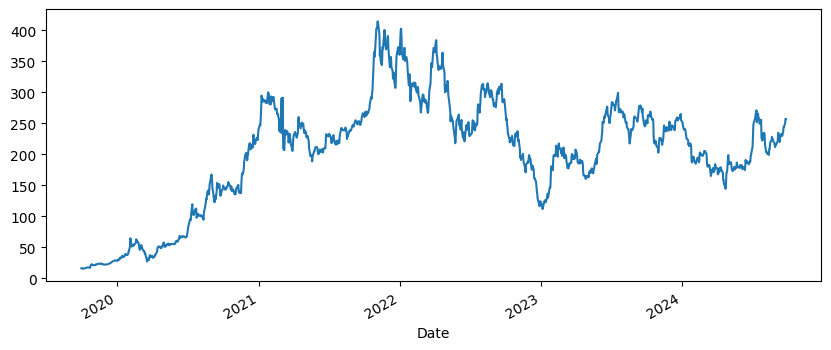

In [7]:
fig = plt.figure(figsize=(10,4))

tsla['High'].plot()

<Axes: xlabel='Date'>

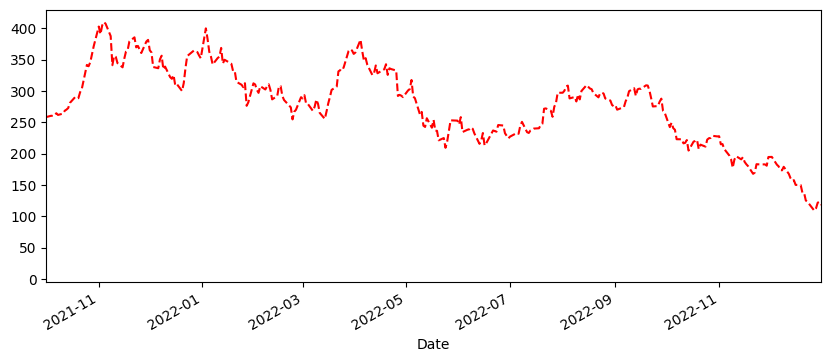

In [8]:
tsla['Close'].plot(xlim=['2021-10-01','2022-12-31'], figsize=(10,4), ls='--', c='red')

RESAMPLING

In [9]:
#using resampling rules to analyze stock/business data

tsla.resample(rule='YE').min() #Year End minimum prices

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,15.3200,15.6320,14.9520,15.4287,36984435
2020-12-31,24.9797,26.9907,23.3673,24.0813,52073166
2021-12-31,184.1830,188.7370,179.8300,187.6670,29401674
2022-12-31,110.3500,116.2700,108.2400,109.1000,41864742
2023-12-31,103.0000,111.7500,101.8100,108.1000,65125203
2024-12-31,140.5600,144.4400,138.8025,142.0500,50869682


<Axes: xlabel='Date'>

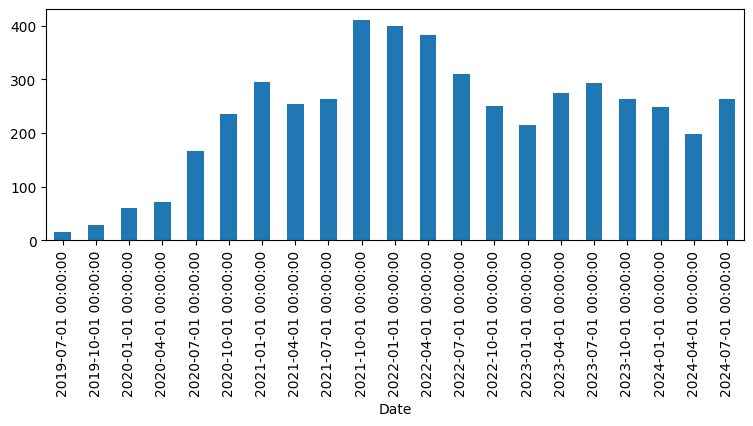

In [10]:
tsla['Close'].resample(rule='QS').max().plot(kind='bar', figsize=(9,3))
#Quartely Start max prices

In [11]:
tsla.resample(rule='ME').max()
#Max prices(frequency) for every month end

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-30,16.2000,16.2653,15.7407,16.0580,89192415
2019-10-31,21.8360,22.7227,21.5067,21.8753,450091365
2019-11-30,24.0000,24.0800,23.6003,23.9680,253059630
2019-12-31,29.0000,29.0207,28.4233,28.7293,273314100
2020-01-31,42.6667,43.5333,42.1667,43.3700,470535420
...,...,...,...,...,...
2024-05-31,183.8000,187.5600,182.2000,186.6000,115266512
2024-06-30,199.5500,203.2000,195.2600,197.8800,118984122
2024-07-31,263.3000,271.0000,257.8600,263.2600,221707273


<Axes: xlabel='Date'>

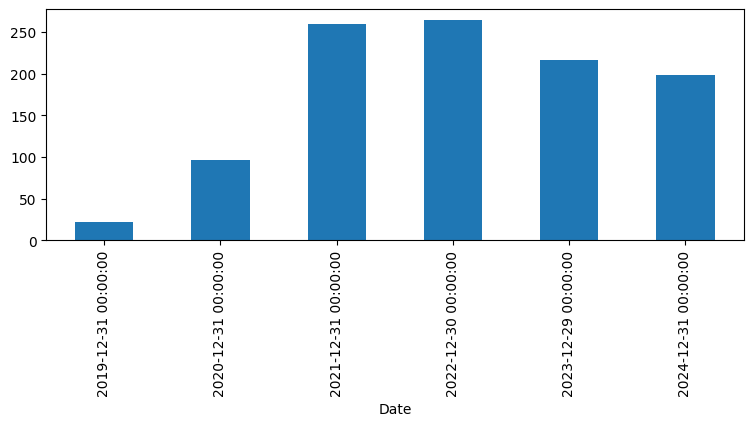

In [12]:
#mean price open for Business Year End
tsla['Open'].resample(rule='BYE').mean().plot(kind='bar',figsize=(9,3))

In [13]:
tsla.resample(rule='MS').mean()
#Monthly Start price Mean

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-01,16.200000,16.265300,15.740700,16.058000,8.919242e+07
2019-10-01,17.596409,18.000226,17.375222,17.756996,1.533385e+08
2019-11-01,22.587125,22.838590,22.259320,22.552535,1.184113e+08
2019-12-01,24.979729,25.449210,24.734114,25.179652,1.481360e+08
2020-01-01,34.869719,35.761976,34.312710,35.243648,2.916464e+08
...,...,...,...,...,...
2024-05-01,177.503450,180.495859,174.195909,177.231818,7.583117e+07
2024-06-01,181.913947,185.694153,178.811053,182.220000,7.405459e+07
2024-07-01,239.729545,247.027195,234.362359,240.621364,1.339385e+08


In [14]:
tsla['High'].resample(rule='YE').max()
#the maximum share price for each year

Date
2019-12-31     29.0207
2020-12-31    239.5730
2021-12-31    414.4970
2022-12-31    402.6670
2023-12-31    299.2900
2024-12-31    271.0000
Freq: YE-DEC, Name: High, dtype: float64

In [15]:
tsla['Low'].resample(rule='YE').min()
#the lowest share price each year

Date
2019-12-31     14.9520
2020-12-31     23.3673
2021-12-31    179.8300
2022-12-31    108.2400
2023-12-31    101.8100
2024-12-31    138.8025
Freq: YE-DEC, Name: Low, dtype: float64

In [16]:
tsla['High'].resample(rule='YE').apply(lambda x: x.idxmax())

Date
2019-12-31   2019-12-27
2020-12-31   2020-12-31
2021-12-31   2021-11-04
2022-12-31   2022-01-04
2023-12-31   2023-07-19
2024-12-31   2024-07-11
Freq: YE-DEC, Name: High, dtype: datetime64[ns]

In [17]:
#return the dates of high & low prices along with the prices for every year

def highest_price(group):
    prices = group['High'].max()
    dates = group['High'].idxmax()
    return pd.Series({'Dates': dates, 'Price': prices})


def lowest_price(group):
    prices_l = group['Low'].min()
    dates_l = group['Low'].idxmin()
    return pd.Series({'Dates': dates_l, 'Price': prices_l})

In [18]:
highest_days = tsla.resample(rule='YE').apply(highest_price)

In [19]:
lowest_days = tsla.resample(rule='YE').apply(lowest_price)

In [20]:
highest_days

,Dates,Price
Date,,
2019-12-31,2019-12-27,29.0207
2020-12-31,2020-12-31,239.5730
2021-12-31,2021-11-04,414.4970
2022-12-31,2022-01-04,402.6670
2023-12-31,2023-07-19,299.2900
2024-12-31,2024-07-11,271.0000


In [21]:
lowest_days

,Dates,Price
Date,,
2019-12-31,2019-10-03,14.9520
2020-12-31,2020-03-18,23.3673
2021-12-31,2021-03-05,179.8300
2022-12-31,2022-12-28,108.2400
2023-12-31,2023-01-06,101.8100
2024-12-31,2024-04-22,138.8025


ROLLING AVERAGE

In [22]:
tsla['High'].rolling(15).mean()

Date
2024-09-25          NaN
2024-09-24          NaN
2024-09-23          NaN
2024-09-20          NaN
2024-09-19          NaN
                ...    
2019-10-04    17.120293
2019-10-03    16.807180
2019-10-02    16.756113
2019-10-01    16.701093
2019-09-30    16.632113
Name: High, Length: 1256, dtype: float64

In [23]:
tsla['Open 20 days Average'] = tsla['Open'].rolling(20).mean()

<Axes: xlabel='Date'>

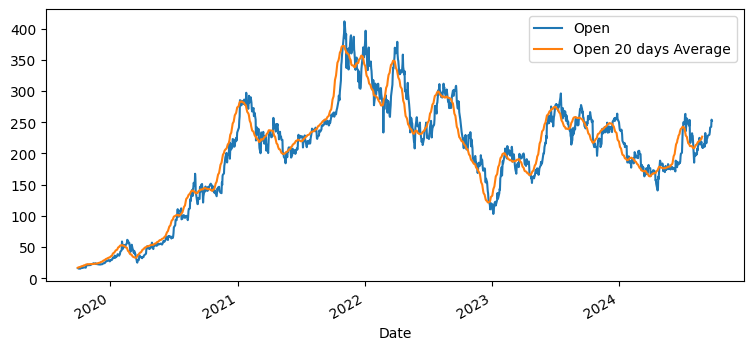

In [24]:
#plot the opening Price against the 20 days average

tsla[['Open', 'Open 20 days Average']].plot(figsize=(9,4))

In [25]:
tsla['High Max'] = tsla['High'].rolling(15).max()

<Axes: xlabel='Date'>

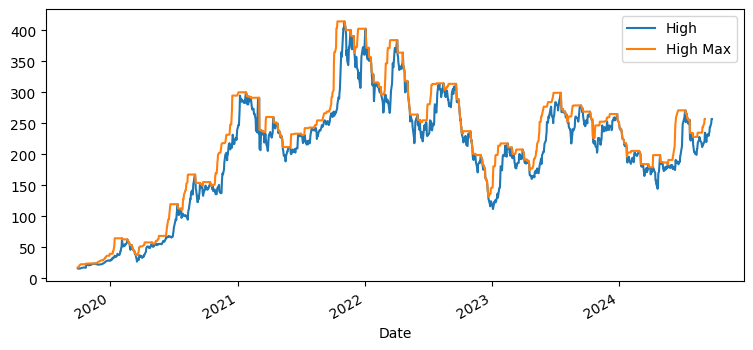

In [26]:
tsla[['High', 'High Max']].plot(figsize=(9,4))

MOVING AVERAGE

In [27]:
#simple moving average

tsla['10 close rolling'] = tsla['Close'].rolling(window=10, min_periods=1).mean()
tsla['20 close rolling'] = tsla['Close'].rolling(window=20, min_periods=1).mean()
tsla['40 close rolling'] = tsla['Close'].rolling(window=40, min_periods=1).mean()

tsla['20 rolling std'] = tsla['Close'].rolling(window=20, min_periods=1).std()

<Axes: xlabel='Date'>

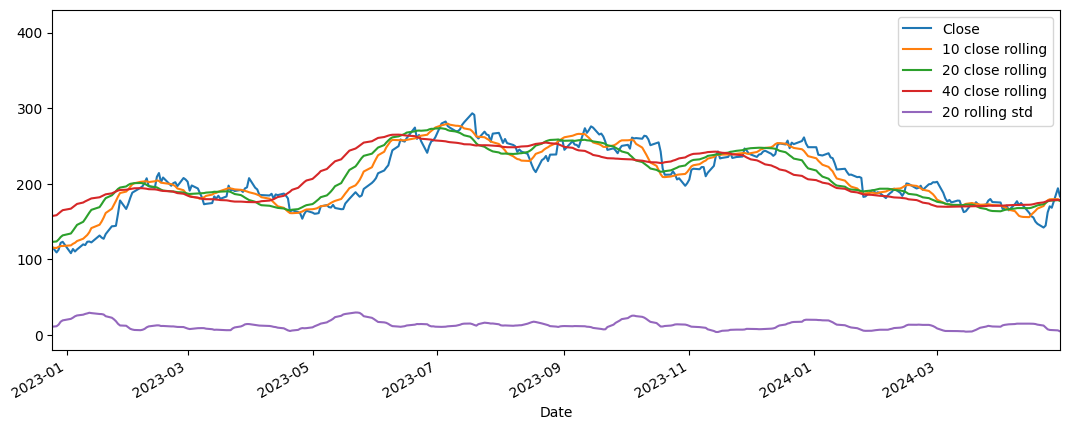

In [28]:
tsla[['Close', '10 close rolling', '20 close rolling', '40 close rolling','20 rolling std']].plot(xlim =['2022-12-25','2024-04-30'], figsize=(13,5))

<Axes: xlabel='Date'>

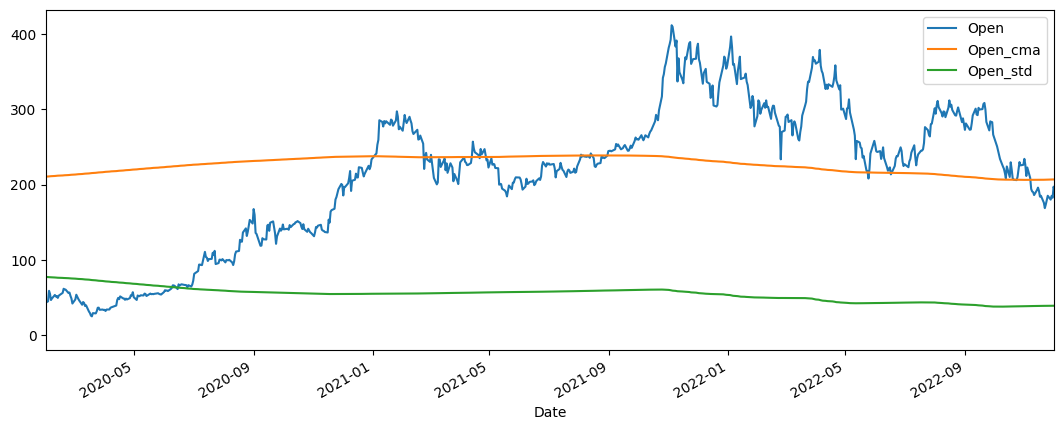

In [29]:
#Cummulative Moving Average

tsla['Open_cma'] = tsla['Open'].expanding().mean()
tsla['Open_std'] = tsla["Open"].expanding().std()
tsla[['Open', 'Open_cma', 'Open_std']].plot(xlim=['2020-02-01', '2022-12-01'], figsize=(13,5))

In [30]:
#E(W)MA - Exponential (Weighted) Moving Average
#formular(EMAt) = a.Pt + (1-a). EMA(t-1)

tsla['Open EMA_0.1'] = tsla['Open'].ewm(alpha=0.1, adjust=False).mean() #smoothing factor 0.1
tsla['Open EMA_30'] = tsla['Open'].ewm(span=30, adjust=True).mean()
tsla['Open EMA_50'] = tsla['Open'].ewm(span=50, adjust=True).mean()

<Axes: xlabel='Date'>

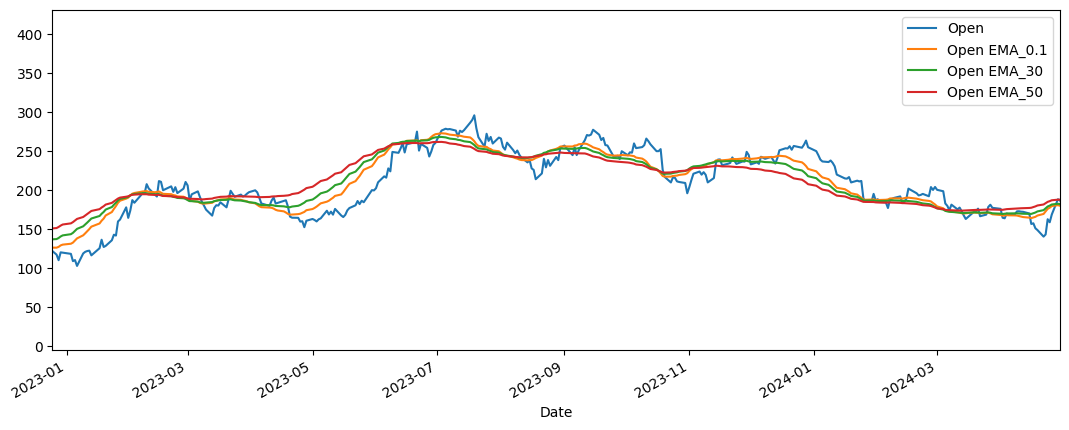

In [31]:
tsla[['Open', 'Open EMA_0.1','Open EMA_30', 'Open EMA_50']].plot(xlim =['2022-12-25','2024-04-30'], figsize=(13,5))

In [32]:
#Moving Average (MA) = u + Q.E(t_1) where Q is a co-efficient and E(t_1) is error with respect to Prev.time stamp

STATIONARITY

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
def adfuller_test(df):
    result = adfuller(df)
    labels = ['Adfuller Test', 'P-Value', '#Lags Used', 'Number of Observation used']
    for value, label  in zip(result,labels):
        print(label+' : '+ str(value))
    if result[1] <= 0.05:
        print("Reject the Null Hypothesis(HO).Hence, Time Series is Stationary")
    else:
        print('Weak Evidence against Null Hypothesis. Time Series is not Stationary')

In [35]:
tsla

,Open,High,Low,Close,Volume,Open 20 days Average,High Max,10 close rolling,20 close rolling,40 close rolling,20 rolling std,Open_cma,Open_std,Open EMA_0.1,Open EMA_30,Open EMA_50
Date,,,,,,,,,,,,,,,,
2024-09-25,252.5400,257.0500,252.2800,257.0200,65034318,NaN,NaN,257.020000,257.020000,257.020000,NaN,252.540000,NaN,252.540000,252.540000,252.540000
2024-09-24,254.0800,257.1900,249.0501,254.2700,88490999,NaN,NaN,255.645000,255.645000,255.645000,1.944544,253.310000,1.088944,252.694000,253.335667,253.325400
2024-09-23,242.6100,250.0000,241.9200,250.0000,86927194,NaN,NaN,253.763333,253.763333,253.763333,3.537320,249.743333,6.225450,251.685600,249.519537,249.609795
2024-09-20,241.5200,243.9900,235.9200,238.2500,99879070,NaN,NaN,249.885000,249.885000,249.885000,8.276934,247.687500,6.537835,250.669040,247.315373,247.464414
2024-09-19,234.0000,244.2400,232.1300,243.9200,102694576,NaN,NaN,248.692000,248.692000,248.692000,7.648331,244.950000,8.338285,249.002136,244.285803,244.551881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-04,15.4407,15.6520,15.2047,15.4287,120317700,17.847040,20.3287,16.552880,18.017710,20.285122,2.181400,198.500816,87.558087,17.548741,18.895479,21.492636
2019-10-03,15.4573,15.6320,14.9520,15.5353,227066445,17.576240,17.6520,16.359940,17.744740,20.123605,2.130249,198.354732,87.675738,17.339597,18.673661,21.255956
2019-10-02,16.2193,16.3100,15.9620,16.2087,93848220,17.343870,17.6520,16.249140,17.505140,19.977072,2.010908,198.209489,87.791538,17.227567,18.515316,21.058440


In [36]:
adfuller_test(tsla['Close'])

Adfuller Test : -1.2431338134172536
P-Value : 0.6547710222984318
#Lags Used : 10
Number of Observation used : 1245
Weak Evidence against Null Hypothesis. Time Series is not Stationary


In [37]:
adfuller_test(tsla['High'])

Adfuller Test : -1.0992386094187294
P-Value : 0.7153754434003948
#Lags Used : 14
Number of Observation used : 1241
Weak Evidence against Null Hypothesis. Time Series is not Stationary


DIFFERENCING

In [38]:
tsla_log  =  np.log(tsla)

Text(0.5, 1.0, 'Log Data of Tesla')

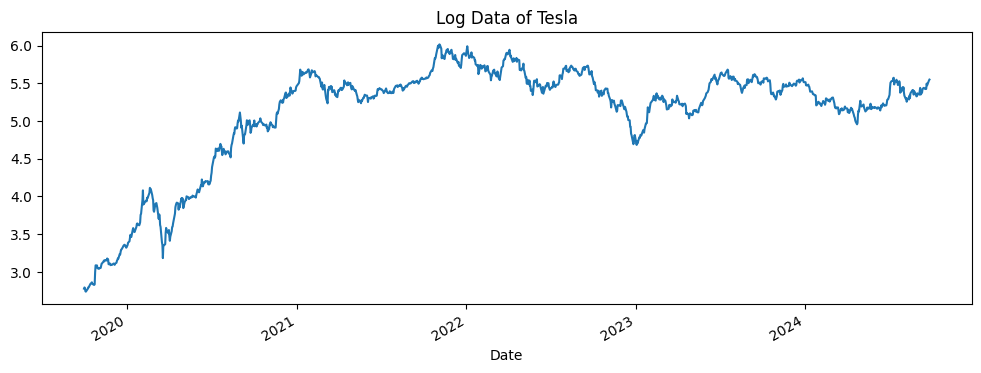

In [39]:
tsla_log['Close'].plot(figsize=(12,4))
plt.title('Log Data of Tesla')
#the scale on the Y-axis changed

In [40]:
MA_log = tsla_log['Close'].rolling(window=30).mean()
std_log = tsla_log['Close'].rolling(window=30).std()

Text(0.5, 1.0, 'Tesla Log wiht MA & STD')

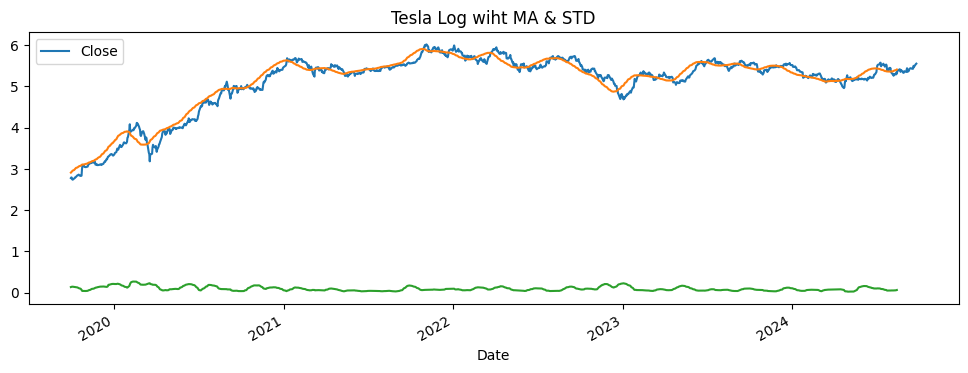

In [41]:
tsla_log[['Close']].plot(figsize=(12,4))
plt.plot(MA_log)
plt.plot(std_log)
plt.title("Tesla Log wiht MA & STD")

In [42]:
ma_scaled = tsla_log['Close'] - MA_log
ma_scaled.dropna(inplace=True)

<Axes: xlabel='Date'>

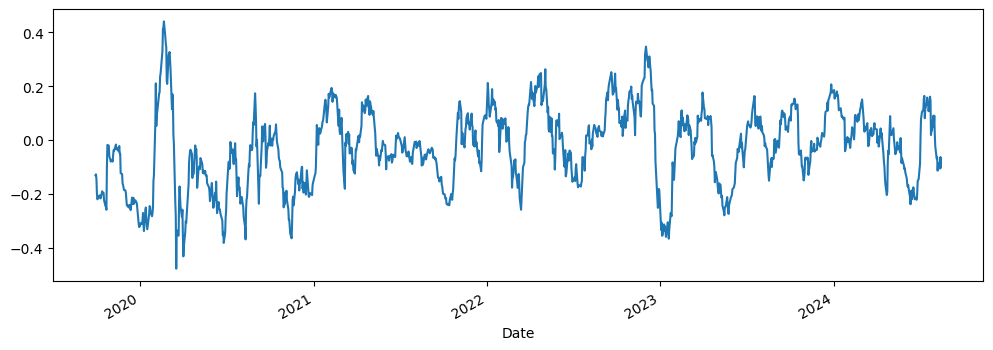

In [43]:
ma_scaled.plot(figsize=(12,4))

In [44]:
ma_scaled.iloc[1227:]

Series([], Name: Close, dtype: float64)

In [45]:
ma_scaled = ma_scaled.iloc[:1226]

ma_scaled = pd.to_numeric(ma_scaled)
ma_scaled.std()

np.float64(0.1442157413989803)

In [46]:
ma_scaled_mean = ma_scaled.rolling(window=30, min_periods=1).mean()
ma_scaled_std = ma_scaled.rolling(window=30, min_periods=1).std()

Adfuller Test : -7.34936663895196
P-Value : 1.0155128147024076e-10
#Lags Used : 13
Number of Observation used : 1212
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


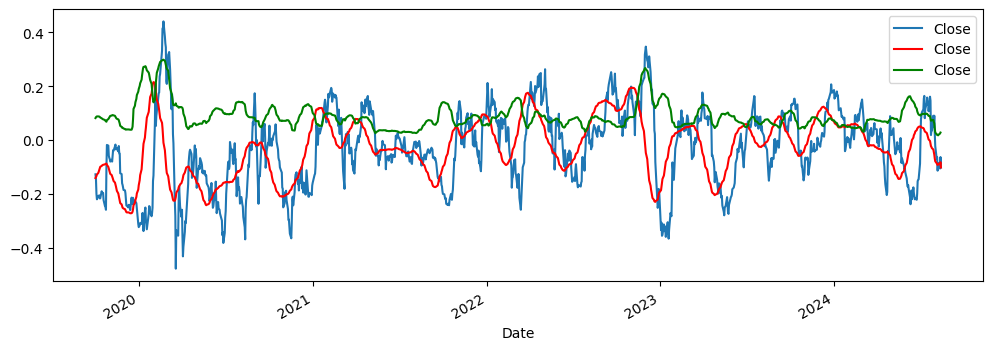

In [47]:
ma_scaled.plot(figsize=(12,4))
ma_scaled_mean.plot(c='red')
ma_scaled_std.plot(c='green')
plt.legend(loc='best')


adfuller_test(ma_scaled)

In [48]:
tsla['diff 20 close'] = tsla['Close'] - tsla['Close'].shift(20)
tsla['20 close MA'] = tsla['diff 20 close'].rolling(window=20, min_periods=1).mean()
tsla['20 close std'] = tsla['diff 20 close'].rolling(window=20, min_periods=1).std()

Adfuller Test : -5.150883659651886
P-Value : 1.1066194127164905e-05
#Lags Used : 21
Number of Observation used : 1214
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


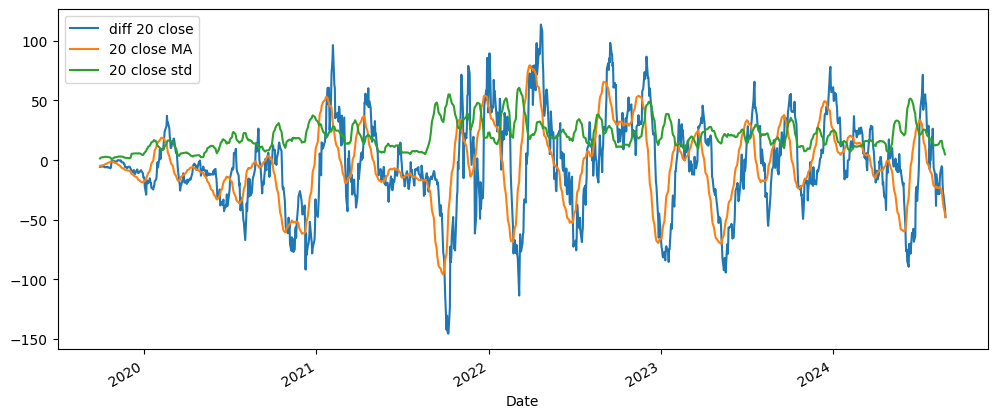

In [49]:
tsla[['diff 20 close', '20 close MA', '20 close std']].plot(figsize=(12,5))

adfuller_test(tsla['diff 20 close'].dropna())

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Tesla Close Price ACF')

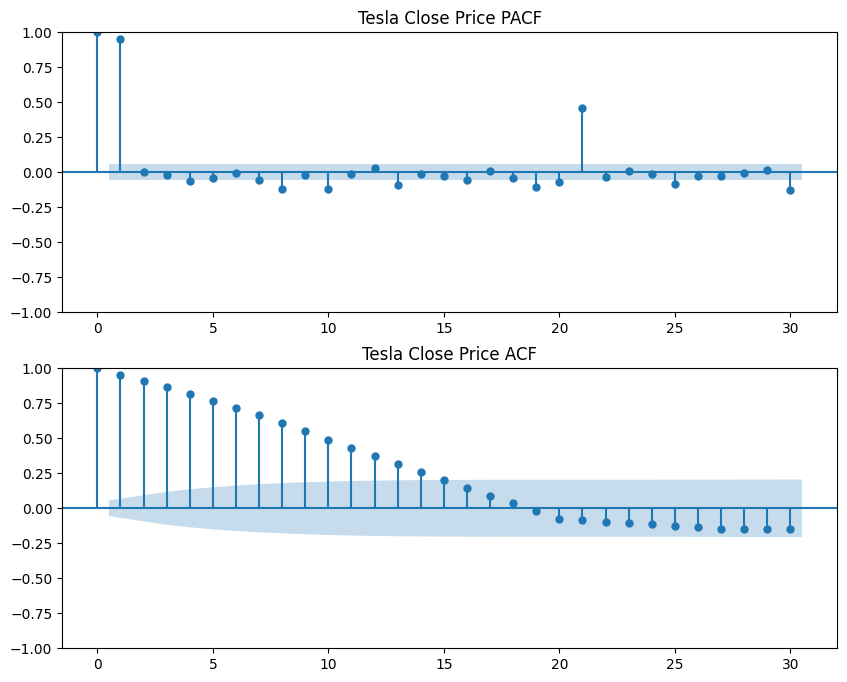

In [51]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(tsla['diff 20 close'].dropna(), lags=30, ax=ax1)
ax1.set_title('Tesla Close Price PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(tsla['diff 20 close'].dropna(), lags=30, ax=ax2)
ax2.set_title('Tesla Close Price ACF')

Text(0.5, 1.0, 'Close 30 ACF')

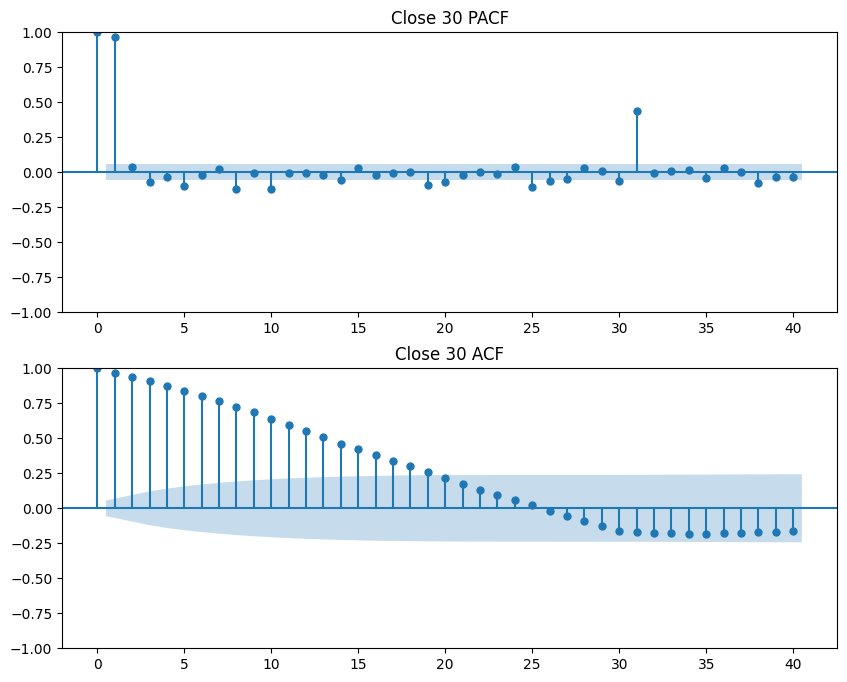

In [52]:
tsla['diff 30 close'] = tsla['Close'] - tsla['Close'].shift(30)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(tsla['diff 30 close'].dropna(), lags=40, ax=ax1)
ax1.set_title('Close 30 PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(tsla['diff 30 close'].dropna(), lags=40, ax=ax2)
ax2.set_title('Close 30 ACF')

Text(0.5, 1.0, 'Log Scaled Price ACF')

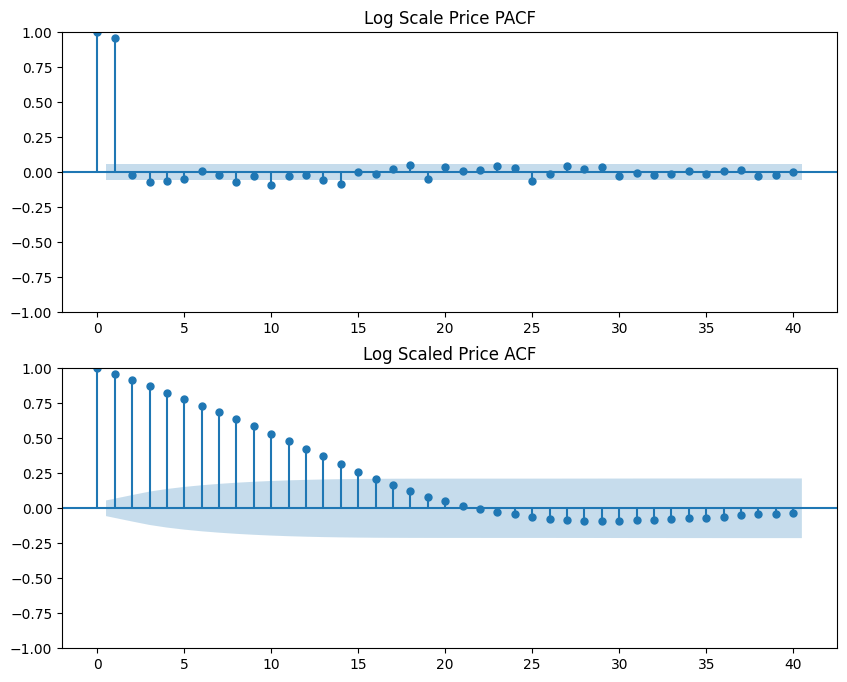

In [53]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(ma_scaled, lags=40, ax=ax1)
ax1.set_title('Log Scale Price PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(ma_scaled.dropna(), lags=40, ax=ax2)
ax2.set_title('Log Scaled Price ACF')

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
tsla_close = tsla[['Close']]

tsla_close = tsla_close.asfreq('ME')

In [74]:
tsla_close.fillna(value=tsla_close.shift(2).mean(), inplace=True) #mean of the last two months' price are used to fill NAN

tsla_close

,Close
Date,
2019-09-30,16.058000
2019-10-31,20.994700
2019-11-30,199.768376
2019-12-31,27.888700
2020-01-31,43.370000
2020-02-29,199.768376
2020-03-31,34.933300
2020-04-30,52.126700
2020-05-31,199.768376


In [76]:
decompose = seasonal_decompose(tsla_close)

trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

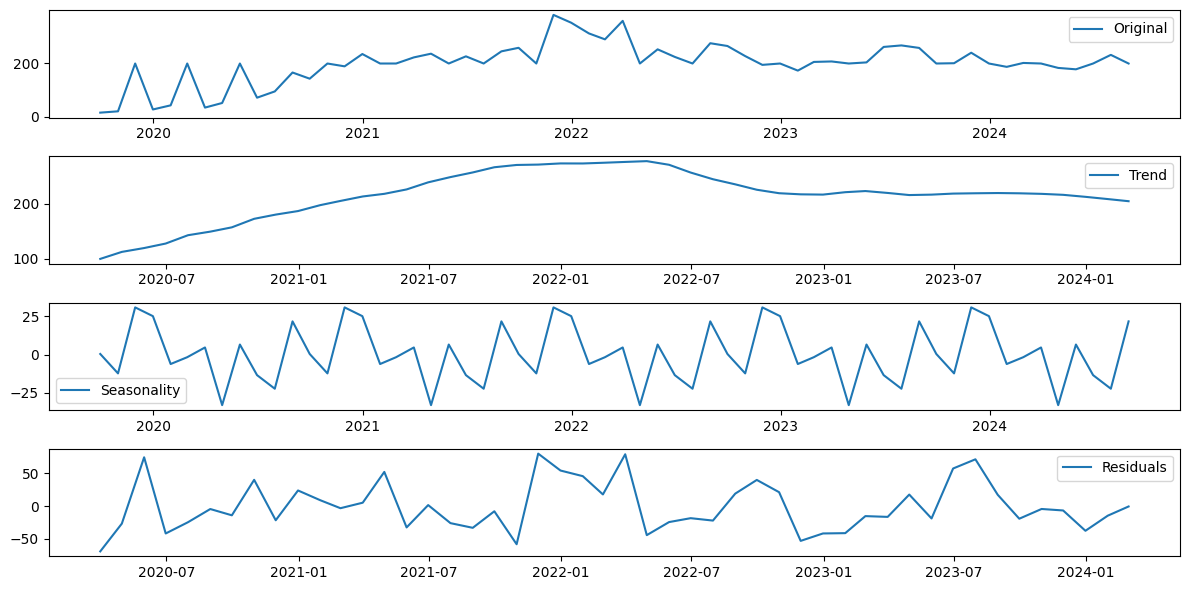

In [79]:

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.plot(tsla_close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
